In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
df = pd.read_excel("AIML exp1 dataset.xlsx") 
df.head()

,S.No,power_rating,weight_of_copper,category
0,0,16.46,34.69,high
1,1,12.52,28.78,high
2,2,7.66,21.48,low
3,3,21.09,41.64,high
4,4,24.43,46.64,high


In [7]:
df=df.drop("S.No",axis=1)
df.head()

,power_rating,weight_of_copper,category
0,16.46,34.69,high
1,12.52,28.78,high
2,7.66,21.48,low
3,21.09,41.64,high
4,24.43,46.64,high


In [9]:
k={'low':0,'high':1}
df['category']=df['category'].map(k)
X=df[["power_rating","weight_of_copper"]]
Y=df[["category"]]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state=42) 
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(max_depth=2, random_state=0) 
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=2, random_state=0)

In [11]:
y_pred = clf.predict (X_test) 
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [13]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score 
print("accuracy score",accuracy_score(y_test, y_pred)) 
print("mean_squared_error",mean_squared_error(y_test, y_pred)) 
from sklearn.metrics import confusion_matrix 

accuracy score 0.9705882352941176
mean_squared_error 0.029411764705882353


In [15]:
y_true = y_test 
data = confusion_matrix(y_true, y_pred) 
data

array([[ 3,  0],
       [ 1, 30]], dtype=int64)

In [17]:
import seaborn as sn 
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index =np.unique(y_true)) 
df_cm.index.name = "Actual" 
df_cm.columns.name = "Predicted" 
plt.figure(figsize = (10,7)) 
sn.set(font_scale=1.4) 
df_cm 

Predicted,0,1
Actual,,
0,3,0
1,1,30


<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='Predicted', ylabel='Actual'>

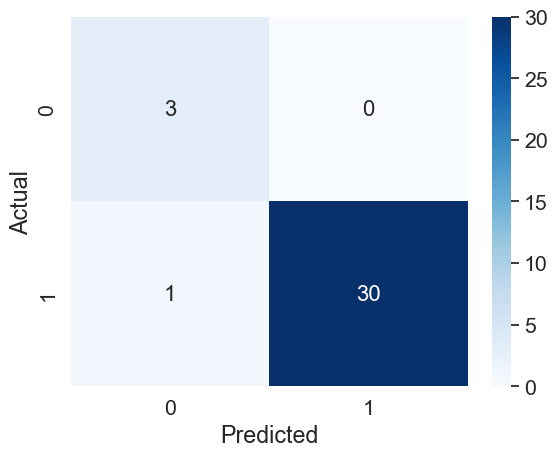

In [23]:
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws= {"size":16})